In [68]:
import re
from unittest import result
import requests
from bs4 import BeautifulSoup
import pandas as pd
import string
from nltk.corpus import stopwords
import string
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import nltk

In [69]:
for page in range(1,6):

    if page == 1: 
        url = "https://indeks.kompas.com/?site=all&date=2021-12-01"
    else: 
        url = "https://indeks.kompas.com/?site=all&date=2021-12-01&page="+str(page)

    page = requests.get(url)
    soup = BeautifulSoup(page.content, "html.parser")

    results = soup.find("div", class_="latest--indeks mt2 clearfix") #tabel
    #print(results)
    berita = results.find_all("a", class_="article__link")  #title
    print("Judul Berita Populer : ")
    urutan = 1
    df = []
    tgl = '2021-12-01'
    for berita in berita:
        title=berita.text
        print(urutan,title)
        df.append(
            {
                'date':tgl,
                'title':title
            }
        )
        urutan+=1

df = pd.DataFrame(df)
df.to_csv('kompas_20211201.csv', encoding="utf-8")

Judul Berita Populer : 
1 Genoa Vs AC Milan, Shevchenko Ingin Buat Mantan Klub Kesulitan
2 ODHA di Depok Masih Dapat Stigma Negatif
3 Pemprov Jakarta Bentuk Tim Khusus Awasi Alat Makan Bahan Melamin Tak Ber-SNI
4 Penonton Lokal Piala AFF 2020 Acuhkan 5 Aturan Ini
5 Pada Akhir Pekan, Penumpang di Bandara Soekarno-Hatta Capai 90.000 Orang
6 PPKM Level 2, Regulasi PTM di Jakarta Barat Tidak Berubah
7 Link Live Streaming Bologna Vs Roma, Kick-off Pukul 00.30 WIB
8 Singgung Varian Corona Omicron, Menlu Ungkap 4 Agenda RI Wujudkan Visi 2045 
9 Real Madrid Vs Athletic Bilbao, Singa Basque Wajib Waspadai Benzema
10 Pelatih Timnas China Akui Kesulitan lantaran Covid-19
11 Mensos Ingatkan Guru Ajarkan Siswa Tak "Bully" Penyandang Disabilitas
12 Link Live Streaming Inter Milan Vs Spezia, Kick-off Pukul 00.30 WIB
13 Ragam Istilah Teknis pada AC yang Perlu Diketahui
14 Massa Reuni 212 Bakal Kumpul di Patung Kuda, Ini Respons Wagub DKI
15 MyPertamina Fair 2021 Siap Manjakan Pelanggan Setia Pertamina

In [77]:
#2
df = pd.read_csv("kompas_20211201.csv")
df


,date,title
0,2021-12-01,Mahasiswa UGM Teliti Ubur-ubur sebagai Pengham...
1,2021-12-01,Contoh-contoh Energi Alternatif Terbarukan
2,2021-12-01,"Ditahan Lagi, Ini Perjalanan Kasus Jerinx SID ..."
3,2021-12-01,Lirik dan Chord Lagu Seventeen Going Under - S...
4,2021-12-01,"Kebal Krisis, Properti Syariah Tumbuh Eksponen..."
5,2021-12-01,INFOGRAFIK: Aturan Perjalanan Darat Selama Lib...
6,2021-12-01,"Stok Kondom KPA Pangkalpinang Menipis, Padahal..."
7,2021-12-01,Menhub Ajak Milenial Jadi Pelopor Gerakan Sad...
8,2021-12-01,BWF World Tour Finals: Kalah Start dan Buru-bu...
9,2021-12-01,Mau Sukses di Piala AFF 2020? Ikuti Aturan Ini


In [78]:
df['title']= df['title'].str.lower() #lower
df['title']= df['title'].str.strip() #whitespace
df['title']= df['title'].str.replace('\d+', '') #remove number
df['title']= df['title'].str.replace(r'[^\w\s]+', '')
#del df['Unnamed: 0']
df

C:\Users\LENOVO~1\AppData\Local\Temp/ipykernel_17152/2612693303.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title']= df['title'].str.replace('\d+', '') #remove number
C:\Users\LENOVO~1\AppData\Local\Temp/ipykernel_17152/2612693303.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title']= df['title'].str.replace(r'[^\w\s]+', '')


,date,title
0,2021-12-01,mahasiswa ugm teliti uburubur sebagai penghamb...
1,2021-12-01,contohcontoh energi alternatif terbarukan
2,2021-12-01,ditahan lagi ini perjalanan kasus jerinx sid v...
3,2021-12-01,lirik dan chord lagu seventeen going under sa...
4,2021-12-01,kebal krisis properti syariah tumbuh eksponens...
5,2021-12-01,infografik aturan perjalanan darat selama libu...
6,2021-12-01,stok kondom kpa pangkalpinang menipis padahal ...
7,2021-12-01,menhub ajak milenial jadi pelopor gerakan sada...
8,2021-12-01,bwf world tour finals kalah start dan buruburu...
9,2021-12-01,mau sukses di piala aff ikuti aturan ini


In [79]:
stop = stopwords.words('indonesian')
test = pd.DataFrame(df)
test['title'] = test['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
print(test)
df = pd.DataFrame(df)
df.to_csv('kompas_20211201_clean.csv', encoding="utf-8")

          date                                              title
0   2021-12-01  mahasiswa ugm teliti uburubur penghambat kanke...
1   2021-12-01          contohcontoh energi alternatif terbarukan
2   2021-12-01         ditahan perjalanan jerinx sid vs adam deni
3   2021-12-01  lirik chord lagu seventeen going under sam fender
4   2021-12-01  kebal krisis properti syariah tumbuh eksponens...
5   2021-12-01     infografik aturan perjalanan darat libur natal
6   2021-12-01  stok kondom kpa pangkalpinang menipis dibutuhk...
7   2021-12-01  menhub ajak milenial pelopor gerakan sadar kes...
8   2021-12-01  bwf world tour finals kalah start buruburu fak...
9   2021-12-01                      sukses piala aff ikuti aturan
10  2021-12-01  wapres maruf investasi singapura periode janua...
11  2021-12-01  pmi manufaktur ri kemenkeu langkah pengendalia...
12  2021-12-01  upn veteran jakarta tanda kekerasan jasad maha...
13  2021-12-01              lirik chord lagu rescue me marshmello
14  2021-1

In [82]:
#3
df = pd.read_csv("kompas_20211201_clean.csv")
df

,date,title
0,2021-12-01,mahasiswa ugm teliti uburubur penghambat kanke...
1,2021-12-01,contohcontoh energi alternatif terbarukan
2,2021-12-01,ditahan perjalanan jerinx sid vs adam deni
3,2021-12-01,lirik chord lagu seventeen going under sam fender
4,2021-12-01,kebal krisis properti syariah tumbuh eksponens...
5,2021-12-01,infografik aturan perjalanan darat libur natal
6,2021-12-01,stok kondom kpa pangkalpinang menipis dibutuhk...
7,2021-12-01,menhub ajak milenial pelopor gerakan sadar kes...
8,2021-12-01,bwf world tour finals kalah start buruburu fak...
9,2021-12-01,sukses piala aff ikuti aturan


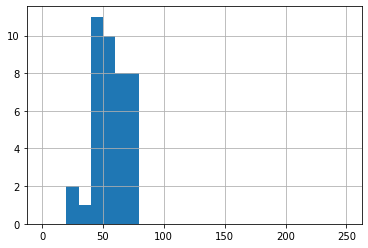

In [83]:
#Distribusi Frekuensi Jumlah Karakter per Data
bin_range = np.arange(0, 260, 10)
df['title'].str.len().hist(bins=bin_range)
plt.show()

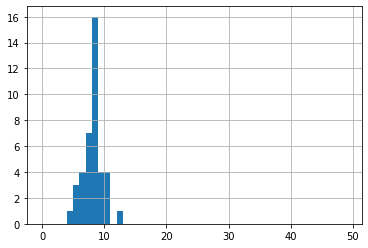

In [84]:
#Distribusi Frekuensi Jumlah Kata per Data
bin_range = np.arange(0, 50)
df['title'].str.split().map(lambda x: len(x)).hist(bins=bin_range)
plt.show()

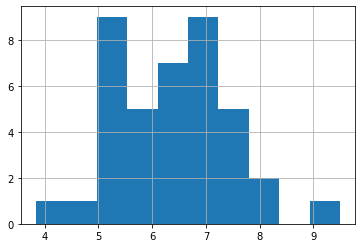

In [85]:
#Distribusi Frekuensi Panjang Kata Rata-Rata Pada Data
df['title'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
plt.show()

<FreqDist with 282 samples and 308 outcomes>
[('perjalanan', 3), ('lirik', 3), ('lagu', 3), ('menteri', 3), ('indonesia', 3), ('jerinx', 2), ('chord', 2), ('pandemi', 2), ('aturan', 2), ('libur', 2), ('natal', 2), ('hasil', 2), ('covid', 2), ('bahas', 2), ('ekonomi', 2), ('omicron', 2), ('pemerintah', 2), ('motor', 2), ('viral', 2), ('teroris', 2)]


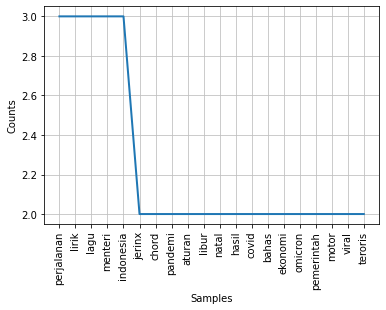

In [86]:
#Distribusi Frekuensi Kata
df['title'] = df['title'].apply(lambda x: word_tokenize(str(x)))
title = [word for title in df['title'] for word in title]
fqdist = FreqDist(title)
print(fqdist)
most_common_word = fqdist.most_common(20)
print(most_common_word)

fqdist.plot(20,cumulative=False)

plt.show()



In [89]:
result = pd.Series(nltk.ngrams(title, 10)).value_counts()[:20]
print (result)

(mahasiswa, ugm, teliti, uburubur, penghambat, kanker, payudara, contohcontoh, energi, alternatif)    1
(minggir, biar, bakar, rumah, teroris, berkat, sinergi, inovasi, pemulihan, ekonomi)                  1
(blitar, mengamuk, minggir, biar, bakar, rumah, teroris, berkat, sinergi, inovasi)                    1
(odgj, blitar, mengamuk, minggir, biar, bakar, rumah, teroris, berkat, sinergi)                       1
(viral, odgj, blitar, mengamuk, minggir, biar, bakar, rumah, teroris, berkat)                         1
(malaysia, viral, odgj, blitar, mengamuk, minggir, biar, bakar, rumah, teroris)                       1
(pasangan, malaysia, viral, odgj, blitar, mengamuk, minggir, biar, bakar, rumah)                      1
(perjalanan, pasangan, malaysia, viral, odgj, blitar, mengamuk, minggir, biar, bakar)                 1
(video, perjalanan, pasangan, malaysia, viral, odgj, blitar, mengamuk, minggir, biar)                 1
(paris, video, perjalanan, pasangan, malaysia, viral, odgj, blit

##analisis
Analisa hasil dari Text Analysis yang kalian lakukan, misal berita dengan tema apa yang sedang banyak diberitakan hari itu. Jika ada tema tertentu yang terlihat bisa dijelaskan per tema

Tuliskan hasil analisis pada kotak isian

In [ ]:
Kata yang sering muncul ada pada berita 1 desember 2021 adalah perjalanan, lirik, lagu, mentri, indonesia.
berdasarkan hasil text analisis ternyata topik yang banyak diberitakan kompas pada 1 desember 2021 mengenai lagu yang dibuktikan dengan kata lirik, lagu menjadi salah satu kata dengan frequensi terbanyak yang ditulis oleh kompas, selain itu chord juga menjadi salah satu kata yang sering muncul.
tren tema tentang pandemi masih menjadi perbincangan pada 1 des 2021 ditambah dengan kata 'omicron' yang mulai muncul, hal ini menunjukan tren berita tentang covid masih sering dibahas
tanggal 1 des 21 juga mendekati perayaan natal dan tahun baru, jadi kata yang sering muncul seperti 'perjalanan, aturan, libur,natal' masih sering diberitakan karena masyarakat sangat antusias terhadap perjalanan saat libur natal dan tahun baru.